<a href="https://colab.research.google.com/github/fabian819/DSF/blob/main/CodingTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 1

- Deadline (upload to Ilias): 2022-03-22 17:00
- Estimated effort: 2-5 hours (if you don't progress after 2 hours of trying, search for help, ChatGPT, Google, colleagues, course tutor)
- Data on Ilias: CCD-Data with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

- **CT-1.1** Write a method (function) which removes the header information in the 
datafile and saves that information into a separate textfile. [0.5 points] 
- **CT-1.2** Write a function which reduces the data resolution by merging/averaging columns such that there is only one column per 1 nm. [2.0 points]  
- **CT-1.3** Now generalize the above merging so that it works for any number nm er column. [2.0 points]
- **CT-1.4** Implement the saving of the reduced dataset to a file. Do this (1) by writing an explicit loop (write line by line) and (2) by using pandas methods. Measure the running times of the two approaches. [2.0 points]
- **CT-1.5** Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2.0 points] 
- **CT-1.6** Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2.0 points]
- **CT-1.7** Plot the full and some reduced datasets in the same figure. Is there any visual difference? [2.0 points]

All the relevant imports

In [101]:
import pandas as pd
from google.colab import drive
import re
import os
import numpy as np

Mount google drive

In [102]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**CT-1.1**

In [103]:

def isolate_header(file_path,file_name):
  '''Takes a file and splits it on the line
  which starts with >, only works if > is not
  used in other parts of the file'''

  path = file_path + '/' + file_name

  if  not os.path.exists(path):
    raise Exception('There is no such file')

  with open(path, 'r') as instream:
    separated = re.split('>.*\n', instream.read())

  with open(path, 'w') as outstream:
    outstream.write(separated[-1])

  try:
    with open(file_path + '/CCD-metadata.txt', 'w') as outstream:
      outstream.write(separated[-2])
  except:
    print("Probably already split")

  

In [104]:
isolate_header('/content/drive/MyDrive/DSF','CCD-Data.txt')

Probably already split


**CT-1.2**

Save the data in a datframe

In [105]:
df = pd.read_csv('/content/drive/MyDrive/DSF/CCD-Data.txt', sep='\t')
df.head()


,Unnamed: 0,Unnamed: 1,316.6137,316.7492,316.8847,317.0203,317.1558,317.2913,317.4268,317.5623,...,778.9703,779.089,779.2076,779.3263,779.4449,779.5636,779.6822,779.8008,779.9194,780.0381
0,2018-10-25 10:32:04.789000,1540456324789,0.329672,0.329672,0.329672,0.090294,-0.716926,-1.829304,-0.686330,-0.428776,...,-0.038483,-0.039623,-0.036920,-0.037309,-0.037299,-0.037476,-0.036856,-0.036853,-0.039100,-0.035545
1,2018-10-25 10:32:04.878000,1540456324878,-0.044412,-0.044412,-0.044412,0.157632,-0.672423,-2.183981,-0.492421,-0.000000,...,-0.039428,-0.038486,-0.037309,-0.036357,-0.037289,-0.038728,-0.037214,-0.036902,-0.040210,-0.038165
2,2018-10-25 10:32:04.962000,1540456324962,0.338219,0.338219,0.338219,0.330993,-0.879836,-0.000000,-0.559845,-0.000000,...,-0.037725,-0.037534,-0.036560,-0.036152,-0.036554,-0.036875,-0.037351,-0.036746,-0.038686,-0.036903
3,2018-10-25 10:32:05.046000,1540456325046,-0.049682,-0.049682,-0.049682,0.519086,-0.681150,-0.000000,-0.417230,-0.000000,...,-0.037613,-0.037168,-0.036369,-0.034549,-0.036252,-0.037948,-0.036713,-0.035706,-0.038203,-0.036822
4,2018-10-25 10:32:05.129000,1540456325129,0.335086,0.335086,0.335086,-0.041393,-0.000000,-1.802774,-0.510417,-0.000000,...,-0.040919,-0.038288,-0.035840,-0.035638,-0.039504,-0.040093,-0.039953,-0.037656,-0.038082,-0.035900


In [106]:
def merging_columns_1nm(dataframe):
  renamed = dataframe.rename(columns=lambda s: s.split('.')[0])   #renaming columns so that only integer wavelengths
  merged =  renamed.iloc[:,2:].groupby(level=0, axis=1,).mean()   #grouping the columns by wavelength and taking the mean
  merged.insert(0, 'Unnamed: 1', dataframe['Unnamed: 1'])
  return merged

In [107]:
test = merging_columns_1nm(df)
test.head()

,Unnamed: 1,316,317,318,319,320,321,322,323,324,...,771,772,773,774,775,776,777,778,779,780
0,1540456324789,0.329672,-0.166957,-0.064746,0.133130,0.123705,-0.249831,0.271327,-0.093151,-0.123458,...,-0.038555,-0.038021,-0.039290,-0.038654,-0.036496,-0.038835,-0.038145,-0.038333,-0.037679,-0.035545
1,1540456324878,-0.044412,-0.411839,-0.133472,2.032979,-0.387814,-0.031617,0.322955,1.744725,-0.051639,...,-0.038100,-0.038118,-0.038622,-0.038308,-0.036896,-0.039010,-0.038400,-0.037930,-0.037812,-0.038165
2,1540456324962,0.338219,-0.094507,-0.024912,0.061890,-0.226986,0.107871,0.121011,-0.208504,-0.418836,...,-0.038063,-0.038303,-0.039200,-0.038397,-0.036932,-0.038245,-0.037664,-0.037514,-0.037057,-0.036903
3,1540456325046,-0.049682,0.027980,-0.008338,-0.088350,0.070348,-0.013674,0.307321,0.159532,-0.047932,...,-0.037775,-0.037678,-0.038711,-0.038133,-0.036972,-0.038177,-0.037273,-0.036996,-0.036614,-0.036822
4,1540456325129,0.335086,-0.162378,-0.102281,0.045717,-0.088278,0.042099,0.304675,-0.261077,-0.009424,...,-0.038433,-0.038135,-0.038991,-0.038178,-0.037010,-0.038540,-0.038076,-0.037606,-0.038132,-0.035900


**CT-1.3**

In [108]:
def merging_columns(dataframe, num_nm):

  #helper function that gives same name to columns in interval based on num_nm
  rename = lambda s : (int(s.split('.')[0]) // num_nm)* num_nm

  renamed = dataframe.iloc[:,2:].rename(rename, axis=1 )
  merged =  renamed.iloc[:,2:].groupby(level=0, axis=1,).mean()  
  merged.insert(0, 'Unnamed: 1', dataframe['Unnamed: 1'])
  return merged

In [109]:
test = merging_columns(df, 4)
test.head()

,Unnamed: 1,316,320,324,328,332,336,340,344,348,...,744,748,752,756,760,764,768,772,776,780
0,1540456324789,-0.022926,0.025313,-0.011433,0.033524,0.042501,0.058004,0.073440,0.133997,0.195013,...,-0.040002,-0.040188,-0.039880,-0.040693,-0.040330,-0.039762,-0.039085,-0.038151,-0.038268,-0.035545
1,1540456324878,0.432932,0.382430,-0.028861,-0.072969,0.142703,0.240415,0.104945,0.310649,0.887396,...,-0.040043,-0.040518,-0.040388,-0.040868,-0.040278,-0.040117,-0.039185,-0.038005,-0.038299,-0.038165
2,1540456324962,-0.006913,-0.051741,-0.033792,0.032180,0.066547,0.146289,0.163428,0.184641,0.287667,...,-0.040071,-0.040117,-0.040391,-0.041096,-0.040837,-0.040078,-0.038912,-0.038238,-0.037636,-0.036903
3,1540456325046,-0.021855,0.134745,0.057089,-0.055655,0.077732,0.042257,0.066341,0.184647,0.250653,...,-0.039594,-0.039767,-0.039578,-0.040114,-0.039909,-0.039165,-0.038337,-0.037899,-0.037284,-0.036822
4,1540456325129,-0.059125,0.006611,0.085647,-0.008280,0.166115,0.154528,0.102235,0.011453,0.268209,...,-0.039999,-0.040000,-0.040040,-0.040451,-0.040261,-0.039540,-0.039117,-0.038106,-0.038087,-0.035900


**CT-1.4**

In [110]:
def save_loop(df):
  with open('/content/drive/MyDrive/DSF/reduced_dataset_loop.txt', 'w') as outstream:
    outstream.write("\t".join(df.columns.format()))
    outstream.write("\n")
    for i in df.index:
      outstream.write("\t".join(df.iloc[i,:].values.astype(str)))
      outstream.write("\n")

def save_built_in(df):
  df.to_csv('/content/drive/MyDrive/DSF/reduced_dataset_built_in.txt', sep='\t', index=False)

In [111]:
%%timeit
save_loop(test)

162 ms ± 41.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [112]:
%%timeit
save_built_in(test)

94.2 ms ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


**CT-1.5**

In [113]:
def plot_difference(df,wav1, wav2):
    diff = pd.DataFrame({'Timestamp' : df['Unnamed: 1'].copy(),
                         'Difference' : df[wav1] - df[wav2]})
    diff.plot(x='Timestamp', y='Difference')


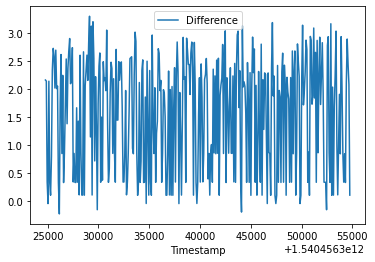

In [114]:
plot_difference(df, '316.6137', '317.2913')

**CT-1.6**

In [115]:
def plot_difference_improved(df,wav1, wav2):
    diff = pd.DataFrame({'Timestamp' : df['Unnamed: 1'].copy(),
                         'Difference' : df[wav1] - df[wav2],
                         '{}'.format(wav1): df[wav1],
                         '{}'.format(wav2): df[wav2]})
    diff['Timestamp'] = (diff['Timestamp'] - diff['Timestamp'].iloc[0])/1000
    plot = diff.plot(x='Timestamp', y=['Difference', '{}'.format(wav1), '{}'.format(wav2)],
                     xlabel= 'Time [sec]', ylabel='Absorbance [AU]', 
                     title='Difference in Absorbance at {}nm and {}nm'.format(wav1, wav2))
    plot.get_figure().savefig('plot.jpg')

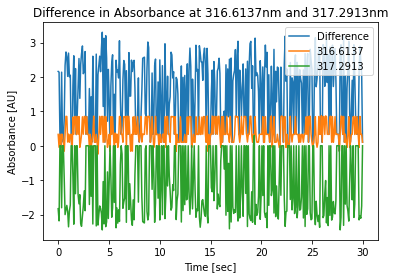

In [116]:
plot_difference_improved(df, '316.6137', '317.2913')

**CT-1.7**

In [117]:
def get_difference(df, wav1, wav2):
  return df[wav1] - df[wav2]

def plot_multiple():
  merged_one = merging_columns_1nm(df)
  merged_four = merging_columns(df, 4)
  new_df = pd.DataFrame({'Timestamp' : (df['Unnamed: 1'] - df['Unnamed: 1'].iloc[0]) /1000 ,
                         'Unreduced' : get_difference(df, '316.6137', '317.2913'),
                         '1nm steps' : get_difference(merged_one, '316', '317'),
                         '4nm steps' : get_difference(merged_four, merged_four.columns[1], merged_four.columns[2])})
  new_df.plot(x='Timestamp', y=['Unreduced', '1nm steps', '4nm steps'], xlabel= 'Time [sec]', ylabel='Difference in Absorbance [AU]')


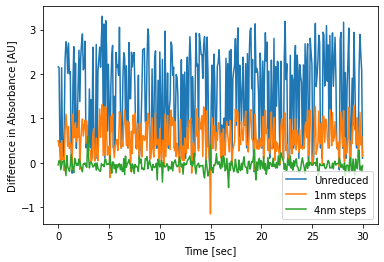

In [118]:
plot_multiple()

Reducing the amount of wavelengths simultaneously reduces the difference in absorbance.